In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [177]:
df = pd.read_csv('train-2.csv')

In [178]:
df.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


Here we will give a short explanation of all the columns in the dataframe:

id: Just a unique number for each person.

age: The age of the person.

hypertension: Whether they have high blood pressure (1) or not (0).

heart_disease: Whether they have heart disease (1) or not (0).

avg_glucose_level: Their average blood sugar level.

bmi: Their body mass index (a measure of body fat).

gender_Female/Male/Other: The gender they identify as.

ever_married_No/Yes: Whether they have ever been married or not.

work_type_Govt_job/Never_worked/Private/Self-employed/children: The type of work they do or have done.

Residence_type_Rural/Urban: Whether they live in a rural or urban area.

smoking_status_formerly smoked/never smoked/smokes: Their smoking habits.

stroke: Whether they've had a stroke (1) or not (0).

display data types and missing values in the datafram df

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

In the output above we can see that there are no missing values in the dataframe. However, when we look at the data types, there are a lot of collumns that have booleans as a value. (e.g. booleans can only have 2 values: True and False). In order to apply Machine Learning on this dataset, we have to transform these boolean values into numerical values (e.g. 1 = TRUE, 0 = FALSE). If we have transformed the dataframe into only numerical values, we can apply our EDA and ML models eventually.

In [180]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


Drop the ID column


In [181]:

# new_data = new_data.drop(['id'], axis=1)
# #display(new_data.head(5))
# new_data_nostroke = new_data[new_data['stroke'] == 0]
# noWorkStrokes = new_data_nostroke['work_type_Never_worked'].sum()
# display(noWorkStrokes)

# new_data_stroke = new_data[new_data['stroke'] == 1]
# display(new_data_stroke)


In [182]:
# continuous_cols = ['age', 'avg_glucose_level', 'bmi']
# binary_cols = ['hypertension', 'heart_disease', 'gender_Female', 'gender_Male', 'gender_Other',
#                'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
#                'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
#                'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked',
#                'smoking_status_smokes']

# # Boxplot for continuous variables
# for col in continuous_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(data=[new_data[col], new_data_stroke[col]], palette='coolwarm')
#     plt.title(f"Comparison of {col} (All vs Stroke)")
#     plt.xticks([0, 1], ['All', 'Stroke'])
#     plt.ylabel(col)
#     plt.show()

# # Barplot for binary variables
# for col in binary_cols:
#     plt.figure(figsize=(8, 4))
#     sns.barplot(x=['All', 'Stroke'], y=[new_data[col].mean(), new_data_stroke[col].mean()], palette='coolwarm')
#     plt.title(f"Comparison of {col} (All vs Stroke)")
#     plt.ylabel(f'Mean {col}')
#     plt.show()

@todo explenation why we droped never worked strokes

Transform df into only numerical values.

In [183]:
df['age'] = df['age'].astype(int)


# df -> df numerical values


#df_numeric = df.astype(int)

# display 5 first rows of the transformed dataframe.
#df_numeric.head(5)
#df_numeric.describe()

df = df[df['gender_Other'] == 0]


df['gender'] = df.apply(
    lambda row: 0 if row['gender_Female'] else 1 ,
    axis=1
)
df = df.drop(['gender_Female', 'gender_Male', 'gender_Other'], axis=1)

df['ever_married'] = df.apply(
    lambda row: 1 if row['ever_married_Yes'] else 0,
    axis=1
)
df = df.drop(['ever_married_No', 'ever_married_Yes'], axis=1)

df['residence_type'] = df.apply(
    lambda row: 0 if row['Residence_type_Rural'] else 1,
    axis=1
)
df = df.drop(['Residence_type_Rural', 'Residence_type_Urban'], axis=1)

df['work_type_self_employed'] = df.apply(
    lambda row: 1 if row['work_type_Self-employed'] else 0,
   
    axis=1
)
df = df.drop(['work_type_Govt_job', 'work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children'], axis=1)

display(df.head(5))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
0,52709,30,0,0,63.60,33.3,False,False,True,0,1,0,0,0
1,72295,75,1,0,215.17,48.0,False,True,False,0,0,1,0,1
2,26451,15,0,0,135.22,19.0,False,True,False,0,1,0,0,0
3,65210,47,0,0,64.89,28.2,False,True,False,0,1,1,1,1
4,69299,49,0,0,222.34,28.8,True,False,False,0,1,1,0,1


In [184]:
df_nostroke = df[df['stroke'] == 1]
df_nostroke.groupby(['gender']).mean()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,ever_married,residence_type,work_type_self_employed
gender,,,,,,,,,,,,,
0,36127.243986,68.725086,0.292096,0.164948,128.032371,29.653265,0.233677,0.515464,0.134021,1.0,0.890034,0.498282,0.319588
1,37807.818584,68.292035,0.261062,0.274336,131.281416,30.174336,0.318584,0.283186,0.221239,1.0,0.898230,0.526549,0.345133


REMOVING THE REDUNDANT/DUMMY COLUMNS
The columns are deleted because their information has been merged or transformed into new columns, which simplifies the dataset. This process eliminates redundancy and reduces the number of columns, which can make the data easier to work with and less prone to overfitting in machine learning models.

#### Gender: 
The gender_Female, gender_Male, and gender_Other columns are merged into a single gender column (0 for Female, 1 for Male). The original columns are now redundant.
#### Ever Married:
ever_married_Yes and ever_married_No are combined into a single ever_married column (1 for Yes, 0 for No), making the original columns unnecessary.
#### Residence Type:
The one-hot encoded columns for Residence_type_Rural and Residence_type_Urban are merged into residence_type (0 for Rural, 1 for Urban), so the originals are deleted.
#### Work Type:
The work_type_Self-employed column is simplified into work_type_self_employed (1 for Self-employed, 0 otherwise). The original work type columns are no longer needed.
While looking at the data , there are 5 collumns

While looking at the data , there are 5 collumns that have continuous numerical values like: 'age', 'hypertension', 'heart_disease', 'avg_glucose_level' and 'bmi'. 

The other columns are only true or false statement. 

In [185]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [186]:
display(df.head(5))


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
0,52709,30,0,0,63.60,33.3,0,0,1,0,1,0,0,0
1,72295,75,1,0,215.17,48.0,0,1,0,0,0,1,0,1
2,26451,15,0,0,135.22,19.0,0,1,0,0,1,0,0,0
3,65210,47,0,0,64.89,28.2,0,1,0,0,1,1,1,1
4,69299,49,0,0,222.34,28.8,1,0,0,0,1,1,0,1


# Data cleaning

We will now look at the data (the continuous values) to see if all the data is logical and consistent

In [187]:
df_stroke = df[df['stroke'] == 1]
display(df_stroke)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
231,43424,78,0,0,78.81,19.6,0,0,0,1,0,1,0,0
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1
33315,4809,80,0,0,109.96,19.9,0,1,0,1,0,1,0,0
33328,39373,82,1,0,196.92,22.2,0,1,0,1,0,1,1,1


### Next we will plot all columns and display boxplots for continuos values and barplots for binary values to inspect the data more closely.

In [188]:
df_nostroke = df[df['stroke'] == 1] 
stroke_count_by_gender = df_nostroke.groupby('gender').size()
display(stroke_count_by_gender)

gender
0    291
1    226
dtype: int64

@TODO explanation why formerly smoked has a higer risk according to the data for a stroke? is it true.

Drop unnecessary columns @todo

In [189]:
columns_to_drop = [
    
    'gender',
    'smoking_status_never smoked', 
    'smoking_status_smokes'
]


df = df.drop(columns=columns_to_drop)



print(df.head())

      id  age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  52709   30             0              0              63.60  33.3   
1  72295   75             1              0             215.17  48.0   
2  26451   15             0              0             135.22  19.0   
3  65210   47             0              0              64.89  28.2   
4  69299   49             0              0             222.34  28.8   

   smoking_status_formerly smoked  stroke  ever_married  residence_type  \
0                               0       0             0               0   
1                               0       0             1               0   
2                               0       0             0               0   
3                               0       0             1               1   
4                               1       0             1               0   

   work_type_self_employed  
0                        0  
1                        1  
2                        0  
3     

In [190]:
df_nostroke = df[df['stroke'] == 0]

There are a lot of outliers in the columns bmi & avg_glucose_levels. 
According to general medical knowlege. An assumption we could make is that people with an high BMI, average glucose level get more strokes.

To test this theory, we will find out how many people had a stroke in total, how many people with a high BMI got a stroke and how many 
people with high BMI also got a stroke. 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
231,43424,78,0,0,78.81,19.6,0,0,0,1,0,1,0,0
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1
33315,4809,80,0,0,109.96,19.9,0,1,0,1,0,1,0,0
33328,39373,82,1,0,196.92,22.2,0,1,0,1,0,1,1,1


median glucose level of stroke patients 104.12
median glucose level of all patients 91.32
Median age of all patients 43.0
median age of stroke patients 72.0


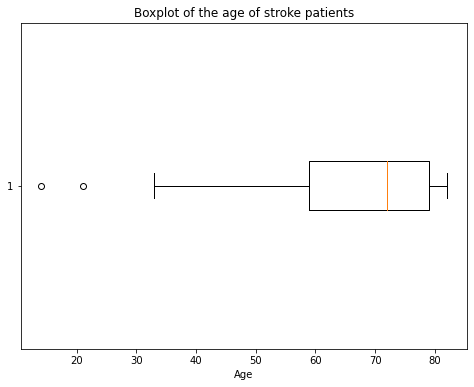

In [191]:
display(df_stroke)

print("median glucose level of stroke patients" + str(" ") + str(df_stroke['avg_glucose_level'].median()))
print("median glucose level of all patients" + str(" ") + str(df['avg_glucose_level'].median()))

print("Median age of all patients" + str(" ") + str(df['age'].median()))
print("median age of stroke patients" + str(" ") + str(df_stroke['age'].median()))


plt.figure(figsize=(8, 6))
plt.boxplot(df_stroke["age"], vert=False)
plt.title("Boxplot of the age of stroke patients")
plt.xlabel("Age")
plt.show()

median glucose level of stroke patients 104.12
median glucose level of all patients 91.32
Median age of all patients 43.0
median age of stroke patients 72.0

In [192]:
df_stroke_and_overweight = df_stroke[df_stroke['bmi'] >= 25]
display(df_stroke_and_overweight) 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
289,11961,57,1,0,196.30,38.6,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,20426,78,1,0,203.87,45.7,0,1,0,1,0,0,1,0
33202,20067,74,0,0,101.67,27.9,0,1,0,1,0,0,0,0
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1


According to the WHO organization people with a bmi score over 25 are overweight. 
In the dataset there are 517 cases of people who had a stroke. 

When filtering the people who had a stroke and a bmi over 25, which means that they are overweight. We see that 414 people suffered from a stoke.
This strongly indicates that a majority of the patient who are overweight suffered a stroke. 

In conclusion this means that approx. 80% of overweight people also suffered from a stroke according to this dataset.

In [193]:
df_stroke_and_hypertension = df_stroke[df_stroke['hypertension'] == 1]
display(df_stroke_and_hypertension)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
289,11961,57,1,0,196.30,38.6,0,1,0,1,0,1,0,0
616,6660,67,1,0,88.79,27.4,1,0,0,1,1,1,1,1
783,2326,67,1,0,179.12,28.1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32941,53156,73,1,0,77.72,31.4,0,1,0,1,1,1,0,1
32947,36575,81,1,1,65.12,27.4,1,0,0,1,1,0,1,0
33137,34567,81,1,0,74.02,25.0,0,1,0,1,0,1,0,1
33147,20426,78,1,0,203.87,45.7,0,1,0,1,0,0,1,0


### We will apply some basic feature engineering. We will use our medical domain knowledge to create new collumns that tell our ML model which factors indicate a higher risk to have a stroke

For Example, if a patient is over 60 (please refer to our EDA boxplot), the chance to get a stroke is higher. 
but if a patient is over 60 and also has a disease like hypertention or a heart problem, the risk of a stroke can be elevated.
This is the reason why we make new columns that show the compounding effect of these combinations. 

In [194]:
# 1. Binary Age Feature (age > 60)
df['age_above_60'] = df['age'].apply(lambda x: 1 if x > 60 else 0)

# 2. Interaction Terms
# Age and Hypertension
df['age_above_60_hypertension'] = df['age_above_60'] * df['hypertension']

# Age and Heart Disease
df['age_above_60_heart_disease'] = df['age_above_60'] * df['heart_disease']

# Hypertension and Smoking (formerly smoked only)
df['hypertension_former_smoker'] = df['hypertension'] * df['smoking_status_formerly smoked']

# 3. BMI Categorization
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    elif 24.9 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# 4. Average Glucose Level Binning
def categorize_glucose(avg_glucose_level):
    if avg_glucose_level < 140:
        return 'normal'
    elif 140 <= avg_glucose_level < 200:
        return 'prediabetic'
    else:
        return 'diabetic'

df['glucose_category'] = df['avg_glucose_level'].apply(categorize_glucose)


print(df[['age_above_60', 'age_above_60_hypertension', 'age_above_60_heart_disease', 'hypertension_former_smoker', 'bmi_category', 'glucose_category']].head())
display(df)


   age_above_60  age_above_60_hypertension  age_above_60_heart_disease  \
0             0                          0                           0   
1             1                          1                           0   
2             0                          0                           0   
3             0                          0                           0   
4             0                          0                           0   

   hypertension_former_smoker bmi_category glucose_category  
0                           0        obese           normal  
1                           0        obese         diabetic  
2                           0       normal           normal  
3                           0   overweight           normal  
4                           0   overweight         diabetic  


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,stroke,ever_married,residence_type,work_type_self_employed,age_above_60,age_above_60_hypertension,age_above_60_heart_disease,hypertension_former_smoker,bmi_category,glucose_category
0,52709,30,0,0,63.60,33.3,0,0,0,0,0,0,0,0,0,obese,normal
1,72295,75,1,0,215.17,48.0,0,0,1,0,1,1,1,0,0,obese,diabetic
2,26451,15,0,0,135.22,19.0,0,0,0,0,0,0,0,0,0,normal,normal
3,65210,47,0,0,64.89,28.2,0,0,1,1,1,0,0,0,0,overweight,normal
4,69299,49,0,0,222.34,28.8,1,0,1,0,1,0,0,0,0,overweight,diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9,0,0,109.80,14.5,0,0,0,0,0,0,0,0,0,underweight,normal
33546,19648,47,0,0,88.61,30.8,0,0,1,1,0,0,0,0,0,obese,normal
33547,35550,3,0,0,89.68,16.2,0,0,0,0,0,0,0,0,0,underweight,normal
33548,65453,56,1,0,82.44,27.8,0,0,1,1,0,0,0,0,0,overweight,normal


In [195]:

glucose_mapping = {
    'normal': 0,
    'prediabetic': 1,
    'diabetic': 2
}

df['glucose_category_encoded'] = df['glucose_category'].map(glucose_mapping)

bmi_mapping = {
    'underweight': 0,
    'normal': 1,
    'overweight': 2,
    'obese': 3
}

df['bmi_category_encoded'] = df['bmi_category'].map(bmi_mapping)

df.drop(['bmi_category', 'glucose_category'], axis=1, inplace=True)


In [196]:
X = df.drop(columns=['stroke']) 
y = df['stroke']  

# Random Undersampling for balance
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

# cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='f1')

y_pred = clf.predict(X_test)

# confusion matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.73      0.71       102
           1       0.73      0.70      0.71       105

    accuracy                           0.71       207
   macro avg       0.72      0.72      0.71       207
weighted avg       0.72      0.71      0.71       207



In [197]:
class DataPreprocessor:
    """
    A class to preprocess data for a machine learning models. 
    """

    def __init__(self, df):
        """
        Make a copy of the dataframe to avoid modifying the original one
        """
        self.df = df.copy()
    
    def age_to_int(self):
        self.df['age'] = self.df['age'].astype(int)

    def preprocess_gender(self):
        """
        Process the gender columns. 
        Converts 'gender_Female', 'gender_Male', and 'gender_Other' 
        into 'gender' column with binary values: 0 for Female and 1 for Male. 
        Rows where 'gender_Other' is 1 are filtered out.
        """
        # Filter out rows where gender_Other == 0
        self.df = self.df[self.df['gender_Other'] == 0]
        
        # Convert gender columns to a single 'gender' column (0 for Female, 1 for Male)
        self.df['gender'] = self.df.apply(
            lambda row: 0 if row['gender_Female'] else 1,
            axis=1
        )
        self.df.drop(['gender_Female', 'gender_Male', 'gender_Other'], axis=1, inplace=True)
    
    def preprocess_ever_married(self):
        """
        Convert ever_married... columns to a single 'ever_married' column (1 for Yes, 0 for No)
        """
        self.df['ever_married'] = self.df.apply(
            lambda row: 1 if row['ever_married_Yes'] else 0,
            axis=1
        )
        self.df.drop(['ever_married_No', 'ever_married_Yes'], axis=1, inplace=True)
    
    def preprocess_residence_type(self):
        """
        Convert residence type columns to a single 'residence_type' column (0 for Rural, 1 for Urban)
        """
        self.df['residence_type'] = self.df.apply(
            lambda row: 0 if row['Residence_type_Rural'] else 1,
            axis=1
        )
        self.df.drop(['Residence_type_Rural', 'Residence_type_Urban'], axis=1, inplace=True)
    
    def preprocess_work_type(self):
        # Convert work type columns and create 'work_type_self_employed' (1 if self-employed, else 0)
        self.df['work_type_self_employed'] = self.df.apply(
            lambda row: 1 if row['work_type_Self-employed'] else 0,
            axis=1
        )
        self.df.drop(['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
                      'work_type_Self-employed', 'work_type_children'], axis=1, inplace=True)
    
    def convert_bool_to_int(self):
        # Convert boolean columns to integers
        self.df[self.df.select_dtypes(include='bool').columns] = self.df.select_dtypes(include='bool').astype(int)
    
    def drop_columns(self, columns):
        # Drop unnecessary columns
        self.df.drop(columns=columns, inplace=True)
    
    def add_age_above_60(self):
        # Add binary age feature (1 if age > 60, else 0)
        self.df['age_above_60'] = self.df['age'].apply(lambda x: 1 if x > 60 else 0)
    
    def add_interaction_terms(self):
        # Create interaction terms based on existing features
        self.df['age_above_60_hypertension'] = self.df['age_above_60'] * self.df['hypertension']
        self.df['age_above_60_heart_disease'] = self.df['age_above_60'] * self.df['heart_disease']
        self.df['hypertension_former_smoker'] = self.df['hypertension'] * self.df['smoking_status_formerly smoked']
    
    def categorize_bmi(self):
        # Categorize BMI into 'underweight', 'normal', 'overweight', and 'obese'
        def categorize(bmi):
            if bmi < 18.5:
                return 'underweight'
            elif 18.5 <= bmi < 24.9:
                return 'normal'
            elif 24.9 <= bmi < 29.9:
                return 'overweight'
            else:
                return 'obese'
        self.df['bmi_category'] = self.df['bmi'].apply(categorize)
    
    def categorize_glucose(self):
        # Categorize glucose levels into 'normal', 'prediabetic', and 'diabetic'
        def categorize(avg_glucose_level):
            if avg_glucose_level < 140:
                return 'normal'
            elif 140 <= avg_glucose_level < 200:
                return 'prediabetic'
            else:
                return 'diabetic'
        self.df['glucose_category'] = self.df['avg_glucose_level'].apply(categorize)
    
    def encode_categories(self):
        # Encode categorical features for BMI and glucose categories
        glucose_mapping = {'normal': 0, 'prediabetic': 1, 'diabetic': 2}
        self.df['glucose_category_encoded'] = self.df['glucose_category'].map(glucose_mapping)
        
        bmi_mapping = {'underweight': 0, 'normal': 1, 'overweight': 2, 'obese': 3}
        self.df['bmi_category_encoded'] = self.df['bmi_category'].map(bmi_mapping)
    
    def drop_categorical_columns(self):
        # Drop original categorical columns after encoding
        self.df.drop(['bmi_category', 'glucose_category'], axis=1, inplace=True)
    
    def reindex_columns(self, reference_columns):
        # Ensure that the dataframe has the same columns as the training data, filling missing ones with 0
        self.df = self.df.reindex(columns=reference_columns, fill_value=0)
    
    def preprocess(self, columns_to_drop, reference_columns):
        # Run the full preprocessing pipeline
        self.preprocess_gender()
        self.age_to_int()
        self.preprocess_ever_married()
        self.preprocess_residence_type()
        self.preprocess_work_type()
        self.convert_bool_to_int()
        self.drop_columns(columns_to_drop)
        self.add_age_above_60()
        self.add_interaction_terms()
        self.categorize_bmi()
        self.categorize_glucose()
        self.encode_categories()
        self.drop_categorical_columns()
        self.reindex_columns(reference_columns)
        return self.df

In [198]:

# Random Undersampling for balance
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Train your DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Load the new test data
new_data = pd.read_csv('test.csv')  # Replace with your new test data file


# PREPROCESSING
def clean_data(dataframe, columns_to_drop, reference_columns):
    processor = DataPreprocessor(dataframe)
    cleaned_data = processor.preprocess(columns_to_drop, reference_columns)
    return cleaned_data

new_data = pd.read_csv('test.csv')  
columns_to_drop = ['gender', 'smoking_status_never smoked', 'smoking_status_smokes']
reference_columns = X.columns  # Reference columns from the training data

X_new = clean_data(new_data, columns_to_drop, reference_columns)


# Step 4: Make predictions
y_new_pred = clf.predict(X_new)

# Optional: If the true labels are available in the new test data
if 'stroke' in new_data.columns:
    y_true = new_data['stroke']
    print(classification_report(y_true, y_new_pred))

# Output predictions
print("Predictions on the new test data:", y_new_pred)


Predictions on the new test data: [0 0 0 ... 0 0 1]


In [199]:

# Save the model
joblib.dump(clf, 'decision_tree_model.pkl')

# Load the model later when needed
loaded_model = joblib.load('decision_tree_model.pkl')


In [200]:
# Make predictions using the preprocessed new data
predictions = loaded_model.predict(X_new)

# Display the predictions
print("Predictions on the new data:")

#  # Save predictions to a CSV file
output_df = pd.DataFrame(predictions, columns=['Predicted_Target'])
# output_df.to_csv('predictions.csv', index=False)



Predictions on the new data:


## Decision Tree

*Describe how this model works.*

A decision tree is a machine learning model that helps make decisions by splitting the data into smaller groups based on features in the data. Each questions (or decision) about the data leads to a branch and eventually a final decision is made. The process starts at the root node, where the models chooses the most important feature to split the data first. As the data gets split, additional questions are asked "Is the person with avg_glucose > 215.17?" and then in the last stage (the leaf nodes) a decision (=prediction) is made "Yes, the person will get a stroke.".

The tree decides which feature provides the best split using measures like Gini or Entropy. Through the usage of these both methods the uncertainty of our predictions should be reduced and the groups of data will become more homegenous.


*Describe the criteria on the basis of which the splits in the decision tree can be made. *

There are different criteria, based on which the data can be split - entropy, gini impurity, MSE, MAE, poisson deviance, huber loss, cross-entropy, friedman MSE, laplacian. As we are facing a classification problem and are dealing with categorical labels, we will be using the standart entropy and gini impurity measures to split the data.

As we are dealing with a binary classification problem (no strok=0, stroke=1) and the outcome is categorical (as we are predicting a class label stroke= 0 or 1 based on the other aformentioned features), we will firstly check which hyperparameters are best suited for our dataset. 

To find out which hyperparameter values are best suited and determine the best combination for our decision tree we will be using the GridSearchCV to systematicly test a wide range of hyperparameter values and determine the best combinations for our model.

In [201]:
from sklearn.model_selection import GridSearchCV

# max depth -> controlls the depth of the tree to avoid overfitting.
# We will try with a shallow tree(5), a slightly deeper one(10) and a relatively deep tree (15)
# min_samples_split -> controls the minimum number of samples needed to split a node
# Higher values (10, 20) prevent the tree from growing too deep.
# min_samples_leaf -> controls the minimum number of samples in a leaf node
# Larger leaf sizes (5, 10) promote generalization and reduce overfitting
# criterion -> the function used to measure the quality of a split (Gini or Entropy)
# gini is faster, while entropy can get better results for complex data.
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=kfold, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best hyperparameters values are: {best_params}')

Best hyperparameters values are: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


*Explain what 'pruning' is and describe what forms of it have been applied.*
*Explain the relationship between 'pruning' and 'underfitting'.**

Prunning is the process of removing unnecessary branches/nodes from the decision tree to make it simpler and prevent the risk of overfitting the data. There are 2 main types of prooning, pre-prunning this is where we adjusted the max_depth, min_samples_split and min_samples_leaf. In doing so we prevented our tree from growing too large and capturing unnecessary details form the training data. Underfitting on the other hand happens, when the model is too simple to capture specific patterns in the data. Meaning - that if we prune too much our decision tree, by setting for example a overly strict min_samples_split of 50, the tree might become too shallow and fail to learn important relationships, which would lead to underfitting. 


In [202]:

best_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)

best_clf.fit(X_train, y_train)

y_pred_best = best_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       102
           1       0.79      0.62      0.70       105

    accuracy                           0.72       207
   macro avg       0.74      0.73      0.72       207
weighted avg       0.74      0.72      0.72       207

